In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Planetary Motion
## Lecture 18

The motion of the planets has played a key role in the developing our mechanical view of the universe.   The theories of Newton's laws of motion and law of gravity show how motions across the Solar System and here are Earth are fundamentally equivalent.

## Kepler's three laws:

1. Each planet moves in an elliptical orbit with the Sun located at one of the foci of the ellipse.

2. The speed of a planet increases as its distance from the Sun decreases such that the line from the Sun to the planet sweeps out equal areas in equal times.

3. The ratio $T^2/a^3$ is the same for all planets that orbit the Sun, where $T$ is the period of the planet and $a$ is the semimajor axis of the ellipse.

Kepler's Laws based on careful observation over many year by Tycho Brahe.

The first and third law describe the shape of orbits but not an explicit relation of position and velocity as function of time.  In this lecture we will determine numerical solutions to the equation of motion for the planets.

## The Equations of Motion

The motion of the Sun and the Earth is a *two-body problem* where the force of gravity is acting between them.

Since the mass of the Sun, $M = 1.99 \times 10^{30}$ kg is much more massive than the Earth, $m = 5.99 \times 10^{24}$, it is reasonable to assume that the Sun is stationary with the Earth moving around it.

This reduces the problem to a *one-body problem* where we consider the motion of a single particle of mass $m$ moving about a fixed center of force, which we take as the origin of the coordinate system.


**Newton's university law graviation**

$$ F = - \frac{G M m} {r^2}\hat{r} = -\frac{GMm}{r^3}\vec{r},$$ 

where $\vec{r}$ is the vector directed from $M$ to $m$.

- negative sign indicate gravity is attractive
- force decreases with separation distance $r$

**Gravitational constant $G$**

$$ G = 6.67 \times 10^{-11}\;\frac{\mbox{m}^3}{\mbox{kg}\cdot\mbox{s}^2} $$

#### Properties of gravitational force

- Magnitude depends only on separation of particles; direction along line joining particles: *central force*
  - orbit of the Earth restricted to a plane ($x-y$)
  - angular momentum $L$ is conserved and lies in the third ($z$) direction
  $$ L_z = ( r \times mv )_z = m (x v_y - y v_x) $$
- Total energy $E$ is conserved
  $$ E = \frac{1}{2} m v^2 - \frac{G M m}{r} $$

Putting the mass $M$ at the origin of our coordinate system, the equation of motion of mass $m$ is

$$ m \frac{d^2\vec{r}}{dt^2} = - \frac{G M m}{r^3} \vec{r}.$$

We can rewrite our force in Cartesian coordinates:

$$
\begin{align}
F_x &= - \frac{G M m}{r^2} \cos\theta = - \frac{G M m}{r^3}x \\ 
F_y &= - \frac{G M m}{r^2} \sin\theta = - \frac{G M m}{r^3}y 
\end{align}
$$

which gives of equations of motion

\begin{align}
\frac{d^2x}{dt^2} &= \frac{G M}{r^3}x \\
\frac{d^2y}{dt^2} &= \frac{G M}{r^3}y
\end{align}

where $r^2 = x^2 + y^2$.

## Simulation of the Orbit

To solve this system, we rewrite each of these second order differential equations as two
first-order differential equations.

\begin{align}
\frac{d v_x}{dt} &= - \frac{G M}{r^3} x \\
\frac{d x}{dt} &= v_x \\
\frac{d v_y}{dt} &= - \frac{G M}{r^3} y \\
\frac{d y}{dt} &= v_y 
\end{align}

We can then solve these equations numerically.

In [2]:
def RK4Stepper( F = lambda s, t, p: s,  
                s0 = [],
                t0 = 0,
                p = [],
                dt = 0.1, 
                tmax = 1,
                ):
    """ 
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary r (current state and time)
    """

    s = np.array(s0)
    t = t0

    while t < tmax:
        r = list(s)
        r.append(t)
        yield r
              
        ds1 = F(s, t, p)
        s1 = s + ds1*dt/2
        ds2 = F(s1, t + dt/2, p)
        s2 = s + ds2*dt/2
        ds3 = F(s2, t + dt/2, p)
        s3 = s + ds3*dt
        ds4 = F(s3, t + dt, p)
        s = s + (ds1 + 2*ds2 + 2*ds3 + ds4)/6*dt
        
        t = t + dt

In [3]:
def Fplanet(s, t, p):
    x, y, vx, vy = s
    
    GM, = p
    
    r = np.sqrt(x**2 + y**2)
    dsdt = [vx,
            vy,
            - GM/r**3 * x,
            - GM/r**3 * y,
            ]
    return np.array(dsdt)

In [4]:
def PlanetApp(x0=149.6e9, # m
              y0 = 0,
              vx0 = 0,
              vy0 = (2*np.pi*149.6e9)/(60*60*24*365), # m/s
              tmax = 60*60*24*365, # one year
              dt = 60*60*24 # one day
              ):
        
    s0 = [x0, y0, vx0, vy0]
    
    G = 6.67e-11
    M = 1.99e30 # GM
    GM = G*M
    p = [GM] 
    
    stepper = RK4Stepper(Fplanet, s0=s0, p=p,
                              tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'vx', 'vy','t'])
    return data

In [5]:
data = PlanetApp()

data.head()

,x,y,vx,vy,t
0,1.496000e+11,0.000000e+00,0.000000,29806.079463,0
1,1.495779e+11,2.575118e+09,-512.398632,29801.669087,86400
2,1.495115e+11,5.149474e+09,-1024.645036,29788.439279,172800
3,1.494008e+11,7.722307e+09,-1536.587031,29766.393999,259200
4,1.492460e+11,1.029285e+10,-2048.072529,29735.539849,345600


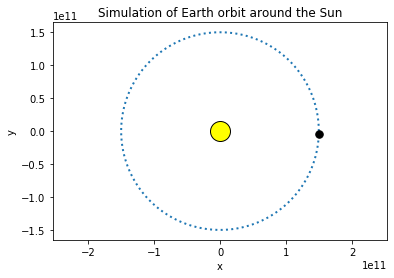

In [6]:
def PlanetPlot(data):

    plt.plot(data.x, data.y, ':', linewidth=2)

    # Plot the Sun at the origin
    plt.plot(0, 0, '.',color="yellow", markersize=40, markeredgecolor='black')
    # Plot the Earth at the final position
    plt.plot(data.x.iloc[-1], data.y.iloc[-1], '.', color= 'k', markersize=15)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    
PlanetPlot(data)
plt.title('Simulation of Earth orbit around the Sun')
plt.show()

## Circular and Elliptical Orbits

We created defaults for the Planet using the average radius ($149.6 \times 10^9$ m) of the Earth's orbit with the the velocity needed to complete one orbit in one year.

If we started our planet with the same initial velocity but further away from the Sun

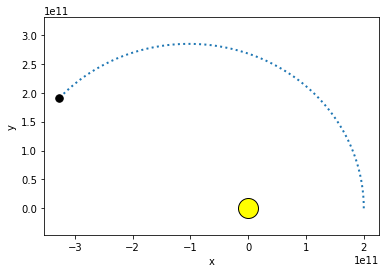

In [7]:
data_far = PlanetApp(x0=200e9, tmax = 60*60*24*365 * 1)
PlanetPlot(data_far)

or closer to the Sun:

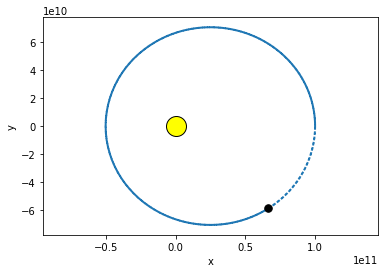

In [8]:
data_near = PlanetApp(x0=100e9, tmax = 60*60*24*365 * 1)
PlanetPlot(data_near)

we can see that both the period and the shape of the orbit change.

- - -
#### Exercise
> Modify the argument `tmax` and try and determine the approximate period of each of these two orbits.

- - -

The magnitude of the acceleration $a$ is related to the radius $r$ of a **circular orbit** by

$$ a = \frac{v^2}{r}$$

where $v$ is the speed of the object. The acceleration is always directed toward the center due to the graviational force.

Hence, we have

$$\frac{m v^2}{r} = \frac{G M m}{r^2}$$

and

$$ v= \left( \frac{GM}{r}\right)^{1/2}$$

This relation between the radius and speed is the general condition of circular orbit.

We can find the dependence of the period $T$ on the radius of a circular orbit using

$$ T = \frac{2 \pi r}{v}$$

which gives

$$ T^2 = \frac{4\pi^2}{GM}r^3$$

This is just as special case of Kepler's third law

$$\frac{T^2}{a^3} = \frac{4\pi^2}{GM}$$

where the radius $r$ corresponds to the semi major axis of an ellipse.

- - -
#### Example
> Calculate the ratio $T^2/a^3$ for our three example orbits.


In [9]:
a = (data.x.max() - data.x.min())/2
T = 60*60*24*365*1
T**2/a**3

2.9588921404544047e-19

In [10]:
a = (data_far.x.max() - data_far.x.min())/2
T = 60*60*24*365*2.88
T**2/a**3

4.518362141889029e-19

In [11]:
a = (data_near.x.max() - data_near.x.min())/2
T = 60*60*24*365*0.36
T**2/a**3

3.0369976473815083e-19

For comparison,

In [12]:
G = 6.67e-11
M = 1.99e30
4*np.pi**2 / (G*M)

2.974272984439245e-19

- - -

## Astronomical Units

The use of SI units (m, s, and kg) leads to numerical values that span a large range of values ($\ldots\times 10^{-19}$, $\ldots \times 10^9$, $\ldots\times 10^{30}$).

It is conveniet to choose a new system of units in which the magnitude of the product $GM$ is not too large and not too small.

To describe the motion of the planets in our solar system, the convention is to choose the length of the Earth's semimajor axis as the unit of length and is called the *astronomical unit* (AU)

$$ 1 \mbox{AU} = 1.496 \times 10^{11}\;\mbox{m}$$

The unit of time is one year or $3.15 \times 10^7$ s. In these units, the period of the Earth is $T=1$ years and its semimajor axis is $a=1$ AU.

From Kepler's third law, this means

$$ GM = \frac{4 \pi^2 a^3}{T^2} = 4 \pi^2 \mbox{AU}^3/\mbox{years}^2\quad\quad\mbox{(astronomical units)}$$

For our example orbits in astronomical units, our distances would be

$$200 \times 10^9\;\mbox{m} = 1.33\;\mbox{AU}$$

and

$$100 \times 10^9\;\mbox{m} = 0.66\;\mbox{AU}$$

## Log-log and Semilog Plots

Here are the values of $T$ and $a$ for our solar system.

In [13]:
df = pd.DataFrame([['Mercury', 0.241, 0.387],
                   ['Venus', 0.615, 0.723],
                   ['Earth', 1.0, 1.0],
                   ['Mars', 1.88, 1.523],
                   ['Jupiter', 11.86, 5.202],
                   ['Saturn', 29.5, 9.539],
                   ['Uranus', 84.0, 19.18],
                   ['Neptune', 165, 30.06],
                   ['Pluto', 248, 39.44]],
                   columns=['planet', 'T', 'a'])
planets = df.set_index('planet')

In [14]:
planets

,T,a
planet,,
Mercury,0.241,0.387
Venus,0.615,0.723
Earth,1.000,1.000
Mars,1.880,1.523
Jupiter,11.860,5.202
Saturn,29.500,9.539
Uranus,84.000,19.180
Neptune,165.000,30.060
Pluto,248.000,39.440


Suppose we want to explore the relationship between $T$ and $a$.

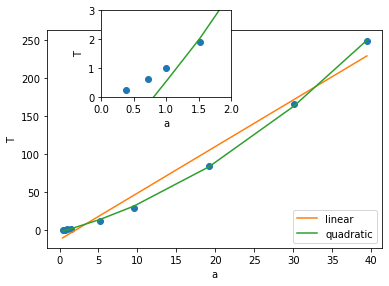

In [15]:
def plot_T_vs_a():
    plt.plot(planets['a'], planets['T'], 'o')

    linear_fit = np.polyfit(planets['a'], planets['T'], 1)
    plt.plot(planets['a'], 
             np.polyval(linear_fit, planets['a']),
             label='linear')

    quadratic_fit = np.polyfit(planets['a'], planets['T'], 2)
    plt.plot(planets['a'], 
             np.polyval(quadratic_fit, planets['a']),
             label='quadratic')
    plt.xlabel('a')
    plt.ylabel('T')


plot_T_vs_a()
plt.legend(loc='lower right')
ax = plt.axes([0.25, 0.65, 0.3, 0.3])
plot_T_vs_a()
plt.xlim(0, 2)
plt.ylim(0, 3)

plt.show()

Definitely not linear. Could be quadratic $T \propto a^2$? 

Look at the relation for the inner planets in the inset plot.

For many problems, it is reasonable to assume an exponetial relation

$$ y = C e^{rx} $$

or a power law relation

$$ y = C x^n$$
where $C, r,$ and $n$ are unknown parameters.

If we assume and exponential form, we can take the natural logarithm of both sides to find

$$ \ln y = \ln C + r x $$

If this is the right relationship, then a plot of $\ln y$ vs $x$ would yield a straight line slope $r$ and intercept $\ln C$.

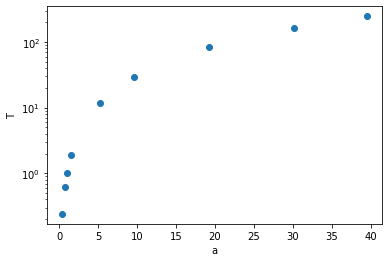

In [16]:
plt.semilogy(planets['a'], planets['T'], 'o')
plt.xlabel('a')
plt.ylabel('T')
plt.show()

Since this plot is not forming a straight line, it is not an exponential relationship between $T$ and $a$. 

For a power law relationship, the natural logarithm of both sides give

$$ \ln y = \ln C + n \ln x$$

If this is the right relationship, then a plot of $\ln y$ vs $\ln x$ would yield a straight line with slope $n$ (the exponent).


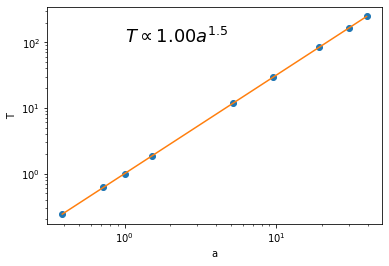

In [17]:
plt.loglog(planets['a'], planets['T'], 'o')

n, lnC = np.polyfit(np.log(planets['a']), 
                        np.log(planets['T']), 1)
C = np.exp(lnC)

plt.plot(planets['a'], 
         C * planets['a']**n,
         label='power law')
plt.text(1, 100, 
         f'$T \propto {C:.2f}a'+'^{'+f'{n:.1f}'+'}$', size=18)
plt.xlabel('a')
plt.ylabel('T')
plt.show()

But of course we knew that it should be a power law relationship from Kepler's third law:

$$\frac{T^2}{a^3} = \frac{4\pi^2}{GM}$$

or

$$T = \frac{4\pi^2}{GM} a^{3/2} = 1.00 a^{1.5}$$

when using astronomical units.


## Simulation of the Orbit (in Astronomical Units)

In [18]:
def PlanetApp(x0=1, # AU
              y0 = 0,
              vx0 = 0,
              vy0 = 2*np.pi, # AU/yr
              tmax = 1, # one year
              dt = 0.001
              ):
        
    s0 = [x0, y0, vx0, vy0]
    
    ## GM in units of (AU)^3/(yr)^2
    GM = 4*np.pi**2 
    p = [GM] 
    
    stepper = RK4Stepper(Fplanet, s0=s0, p=p,
                              tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'vx', 'vy','t'])
    return data

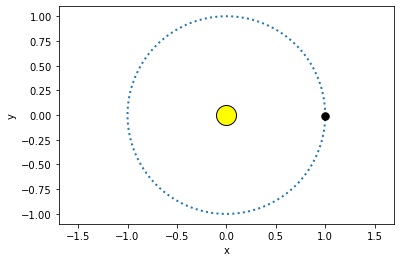

In [19]:
data = PlanetApp()
PlanetPlot(data)

### Elliptical orbits

The choice of initial velocity was critical to acheive a circular orbit. 

Notice that we chose

$$ v_0 = 2\pi $$

which may seem like a slightly strange looking speed. 

But, if you recall the units for this speed is in units of AU/yr perhaps, hopefully you'll see why this has to be the correct speed.


If we change the initial speed to being different from $2\pi$, we get different shaped orbits.

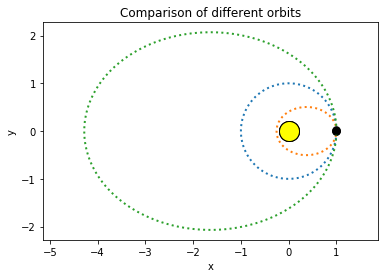

In [20]:
data = PlanetApp(vy0=2*np.pi, tmax = 1.0)
PlanetPlot(data)

data = PlanetApp(vy0=4, tmax = 0.5)
PlanetPlot(data)

data = PlanetApp(vy0=8, tmax = 4.29)
PlanetPlot(data)

plt.title('Comparison of different orbits')
plt.show()

- - -
### Textbook readings

This lecture is based on CSM Chapter 5:

- 5.1 Planetary Motion
- 5.2 The Equations of Motion
- 5.3 Circular and Elliptical Orbits
- 5.4 Astronomical Units
- 5.5 Log-log and Semilog Plots
- 5.6 Simulation of the Orbit